## Quality Criteria 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import json
import numpy as np
from functions import pth_sfm,openmvg_bin_to_json

In [3]:
from master_functions import sfm_pipe

In [4]:
#sfm_pipe('/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_10', width=3840)

In [5]:
path_incr = '/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_10/incremental'
path_bin = pth_sfm(path_incr)

In [6]:
path_bin

'/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_10/incremental/sfm_data.bin'

In [7]:
path_json = openmvg_bin_to_json(path_bin)

In [8]:
with open(path_json) as json_data:
    dic = json.load(json_data)

In [11]:
vec_list = []
n_frms = len(dic['extrinsics'])
for frm in dic['extrinsics']: 
    vec_list.append(frm['value']['center'])
vec_mat = np.asarray(vec_list)

In [12]:
vec_mat

array([[-2.25095255e-02,  5.38292275e-02,  5.81505161e-01],
       [-2.41436413e-02,  3.44083358e-02,  6.27797358e-01],
       [-2.45860558e-02,  1.65526326e-02,  6.70848480e-01],
       [-2.47903419e-02, -2.76072177e-03,  7.17082917e-01],
       [-2.45499146e-02, -2.17656472e-02,  7.62949545e-01],
       [-2.35961732e-02, -4.00245362e-02,  8.06396445e-01],
       [-2.25503167e-02, -5.83347190e-02,  8.52209241e-01],
       [-2.08986353e-02, -7.62166484e-02,  8.95202408e-01],
       [-1.91169762e-02, -9.47497228e-02,  9.40574920e-01],
       [-1.73601192e-02, -1.13652973e-01,  9.86254871e-01],
       [-1.55719743e-02, -1.31642171e-01,  1.02911644e+00],
       [-1.35952753e-02, -1.50493908e-01,  1.07434898e+00],
       [-1.18739510e-02, -1.69554771e-01,  1.12000768e+00],
       [-1.03306859e-02, -1.87626684e-01,  1.16297518e+00],
       [-9.46782240e-03, -2.05952405e-01,  1.20645839e+00],
       [-9.03532933e-03, -2.25022310e-01,  1.25235138e+00],
       [-8.50857595e-03, -2.43363344e-01

In [26]:
norms = np.asarray([np.linalg.norm(vec) for vec in vec_mat])

In [31]:
idx = np.arange(0,len(norms))

In [30]:
norms 

array([0.58442495, 0.62920297, 0.6715029 , 0.71751661, 0.76365467,
       0.80773385, 0.85450105, 0.89868408, 0.9455285 , 0.99293355,
       1.03761881, 1.08492349, 1.13283142, 1.17805848, 1.22394766,
       1.27243886, 1.31915646, 1.36812921, 1.41776371, 1.46438675,
       1.51431451, 1.56131137, 1.6115214 , 1.66157984, 1.70907318,
       1.75922038, 1.8092294 ])

In [27]:
from matplotlib import pyplot as plt 

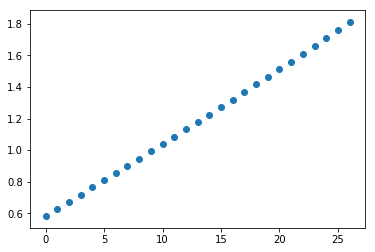

In [32]:
plt.scatter(x=idx, y=norms)

### Failed case 

In [42]:
path_json = '/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_5/sfm_data.json'
with open(path_json) as json_data:
    dic = json.load(json_data)

In [48]:
dic['views'][0

{'key': 0,
 'value': {'polymorphic_id': 1073741824,
  'ptr_wrapper': {'id': 2147483649,
   'data': {'local_path': '',
    'filename': 'frame0188.png',
    'width': 3840,
    'height': 2160,
    'id_view': 0,
    'id_intrinsic': 0,
    'id_pose': 0}}}}

## Find Fails 

In [ ]:
%load_ext autoreload
%autoreload 2

In [5]:
import os 
from os.path import isfile, join 

from functions import pth_vids

In [6]:
def find_fail_sets(pth_sets_dir): 
    
    aux_pth = 'incremental/sfm_data_color.ply'
    
    pths_sets = [join(pth_sets_dir, set_) for set_ in os.listdir(pth_sets_dir)]

    success_sets = []
    fail_sets = []
    
    for pth in pths_sets:
        if isfile(join(pth, aux_pth)): success_sets.append(pth)
        else: fail_sets.append(pth)
        
    return success_sets, fail_sets

In [7]:
VID = ['OKjR_A_u6Ww']

for v in VID: 
    pth_sets = join(pth_vids(),v, 'sets')
    s_sets, f_sets = find_fail_sets(pth_sets)

In [8]:
f_sets

['/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_12',
 '/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_5',
 '/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_6',
 '/home/dhacker/Draining-Youtube/videos/OKjR_A_u6Ww/sets/set_7']